*Created by Petteri Nevavuori.*

---

# Deep Learning seminaari

Kirjana Goodfellow et al.: Deep Learning (2016)

Otsikot seuraavat pääotsikoiden tasolla kirjaa, mutta alaotsikot eivät aina.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1">1. Introduction</a></span></li><li><span><a href="#2.-Linear-Algebra" data-toc-modified-id="2.-Linear-Algebra-2">2. Linear Algebra</a></span><ul class="toc-item"><li><span><a href="#PCA" data-toc-modified-id="PCA-2.1">PCA</a></span></li></ul></li><li><span><a href="#3.-Probability-and-Information-Theory" data-toc-modified-id="3.-Probability-and-Information-Theory-3">3. Probability and Information Theory</a></span></li><li><span><a href="#4.-Numerical-Computation" data-toc-modified-id="4.-Numerical-Computation-4">4. Numerical Computation</a></span><ul class="toc-item"><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-4.1">Gradient Descent</a></span></li><li><span><a href="#Gradient-Descentin-laajennokset" data-toc-modified-id="Gradient-Descentin-laajennokset-4.2">Gradient Descentin laajennokset</a></span></li></ul></li></ul></div>

##  1. Introduction

Datapohjainen koneoppiminen on ennenkaikkea representaatioiden oppimista. Representaatiolla tarkoitetaan piirteitä, jotka algoritmit oppivat itse datasta. Tekoäly on vain hypetermi, joka ei varsinaisesti tarkoita yhtään mitään, ja jonka sisään koneoppimisen ja syväoppimisen menetelmät kuuluvat.

Syväoppimismenetelmät pohjaavat hyvin vahvasti matemaattisiin malleihin, kuten lineaarialgebraan, todennäköisyys- ja informaatioteorioihin, koneelliseen laskentaan ja koneoppimisen perusteisiin. Neuroverkot, eli aivojen toimintaa jäljittelevät algoritmit, ovat nousseet esille jo 40-luvulta alkaen (esim. Perceptron). Laskenta- ja tallennuskapasiteetin kasvu on keskiössä etenkin käytössä olevien datasettien määrän ja kokoluokan näkökulmasta.

## 2. Linear Algebra

Tässä luvussa käydään läpi kirjoittajien notaatiota sekä matriisilaskennan perusteita aina tensoreihin asti. Lineaarialgebran peruselementit ovat:

 - *Skalaari*: Yksittäinen luku, tai yhden alkion vektori.
 - *Vektori*: Lukujono, tai yhden sarakkeen matriisi.
 - *Matriisi*: Taulukko, tai kaksiulotteinen tensori.
 - **Tensori**: Moniulotteinen tietorakenne.
 

Näistä elementeistä etenkin tensori muodostuu tärkeäksi syväoppimisen alueella, sillä se on lähes pääsääntöisimmin käytetty tietorakenne mm. TensowFlow-, Keras- ja PyTorch-kirjastoissa. Tensorilla pystytään helposti mallintamaan vaikkapa kolmiulotteista maailmaa käyttämällä kolmiulotteista tensoria.

Matriisien summaus, kertominen skaalarilla ja skalaarin summaus on elementtikohtaista. Matriisien keskinäinen kerronta taas tuottaa uuden matriisin: 

$$\begin{bmatrix}
1 & 2 \\
2 & 3 \\
3 & 4 
\end{bmatrix}*
\begin{bmatrix}
1 \\
0
\end{bmatrix}=
\begin{bmatrix}
1 \\
2 \\
3
\end{bmatrix}
$$

Sama esitettynä vielä Python-syntaksilla:

In [1]:
import numpy as np
x1 = np.array([[1,2],[2,3],[3,4]])
x2 = np.array([[1],[0]])
np.matmul(x1,x2)

array([[1],
       [2],
       [3]])

Muutoin luvussa käydään hyvinkin pitkälti matikan kurssien P1 ja P2 asiaa. Kirjan pääpaino ei ole lineaarialgebrassa, mutta sitä käydään riittävästi läpi, jotta sen päälle rakentaville aiheille on riittävästi käsiteltyä pohjaa. 

Eräs tämän luvun alun pääpainoista kiteytyy lineaariyhtälön $Ax=b$ ratkaisemiseen, missä $A \in \mathbb{R}^{m \times n}$ on matriisi, $b \in \mathbb{R}^{m}$ on vektori ja $x \in \mathbb{R}^{n}$ on tuntemattomia arvoja sisältävä vektori. Ratkaisuun hyödynnytään identiteettimatriisia, joka saadaan kertomalla matriisi $A$ sen käänteismatriisilla $A^{-1}$. Lopputuloksena lineaariyhtälö voidaan täten kirjoittaa muotoon $x = A^{-1}b$.

Luvussa käydään läpi myös lineaarista riippuvuutta sekä virittäviä joukkoja, mitkä liittyvät olennaisesti lineaaristen ongelmien ratkaisuun. Vektori $a \in \mathbb{R}^{n}$ on lineaarisesti riippumaton, mikäli yksikään saman joukon muista vektoreista ei ole sen lineaarikombinaatio - sitä ei siis voida johtaa mistään muusta joukon vektorista. Virittävä joukko taas on kokoelma riippumattomia vektoreita, joilla saadaan täytettyä $n$-ulotteinen lukuavaruus joko osin tai kokonaan. Virittävällä joukolla voidaan ratkaista vain ne lineaariset ongelmat, joiden ratkaistut arvot ovat virittävän joukon kattaman $n$-ulotteisen alueen sisällä.

Vektorin pituutta ilmaistaan sen etäisyydellä origosta, esimerkiksi normaalivektorilla. $L^2$ eli Eukliidinen normaali on yleisesti käytetty mitta, jossa vektorin pituus lasketaan sen neliönä. Mitan matemaattinen merkintätapa on usein $\|x\|_2$. $L^1$ taas on lineaarisesti kasvava mitta. Muitakin tapoja löytyy.

Matriiseista nostetaan erikseen vielä esiin muutamia erikoistapauksia. Näitä ovat:

 - Diagonaalimatriisi, jossa nollasta poikkeavia lukuja esiintyy vain halkaisijalla.
 - Symmetrinen matriisi, jossa $A=A^T$.
 - Yksikkövektori, jonka pituus $\| x \|_2 = 1$.
 - Kohtisuorat eli 90 asteen kulmassa olevat vektorit, joiden tulo $x^Ty=0$.
 - Kohtisuorat matriisit, joiden tulo $A^TA=I$.
 

Luvussa käydään läpi myös ominaisvektoreita (*eigenvector*), joka on yksi menetelmä matriisin ositteluun (*decomposition*). Esimerkiksi vektori $v$ on matriisin $A$ ominaisvektori, jos $Av=\lambda v$ ja $\lambda$ on skalaarikerroin. Toisin sanoen vektorilla $v$ voidaan kattaa koko matriisi $A$. Ominaisvektorit ovat matriisikohtaisesti riippumattomia ja niitä on normaalisti useampi matriisia kohden - ominaisvektoreista muodostetaan normaalisti matriisi $V$. Käytännössä ominaisvektoreita voidaan käyttää skaalauksessa, kun tahdotaan esimerkiksi muokata kahdessa ulottuvuudessa olevasta ympyrästä ellipsi. 

Ominaisvektoreita hyödyntämällä voidaan matriisi lausua kaavana

$$A=V \text{diag} (\lambda)V^{-1}.$$

Toinen osittelumenetelmä on yksittäisarvo-osittelu (*singular value decomposition, SVD*). Riippumattomien vektoreiden joukon ja niiden skalaarien selvittämisen sijasta matriisi $A$ hajoitetaan matriisituloksi $UDV^T$. Matriiseina $A$ on $m \times n$, $U$ on $m \times m$, $D$ on $m \times n$ ja $V$ on $n \times n$. Matriisit $U$ ja $V$ ovat kohtisuoria toisiinsa nähden ja neliön muotoisia. $D$-matriisin halkaisijalla ovat $A$-matriisin yksittäisarvot eli ulottuvuuskohtaiset kertoimet. 

Tätä kaikkea voidaan hyödyntää matriisi-inversioiden tekemisessä. Ominaisvektoreista mainittu mukaan luettuna matriisi voidaan jo lausua

$$A=V \text{diag} (\lambda)V^{-1} = UDV^T.$$

### PCA

Käyttämällä vain perinteistä lineaarialgebraa voidaan hyödyntää jo yhtä koneoppimismenetelmää dimensionaalisuuden vähentämiseksi, pääkomponenttianalyysiä (*principal component analysis*). Menetelmän tavoitteena on supistaa matriisin $A \in \mathbb{R}^n$ ulottuvuuksia siten, että mahdollisimman vähän informaatiota joutuu hukkaan. Toisin sanoen matriisin $A$ jokaiselle vektorille $x \in \mathbb{R}^n$ pyritään löytämään koodaava vektori $c \in \mathbb{R}^l$.  Tavoitteena on löytää vektorin $c$ tuottava koodaava funktio $\text{f}(x)=c$ sekä dekoodaava funktio $\text{g}(\text{f}(x)) = \text{g}(c) \approx x$. Tämä tapahtuu määrittämällä dekodaausfunktioksi $\text{g}(c)=Dc$, jossa $D \in \mathbb{R}^{n \times l}$ ja saman matriisin sarakkeiden tulee myös olla toisiinsa nähden vastakkaiset.

Tavoitteena tällä kaikella on löytää uniikki ratkaisu, jolla matriisin $D$ laskenta on tehokasta, jota varten kirjassa käydään algoritmin johtaminen perusteellisesti läpi.

## 3. Probability and Information Theory

Todennäköisyysteoriat ovat matemaattisia malleja ja/tai kehyksiä (*framework*) epävarmuuksien esittämiseen määräällisessä eli kvantifoidussa muodossa. Ne voidaan nähdä logiikan laajennoksina epätodennäköisyyksien alueelle. Todennäköisyydet ovat tekoälyyn liittyen tärkeässä roolissa sekä mallien suunnittelun että niiden toiminnan tarkastelun kohdilla. Niillä on samoin myös rooli mallien epävarmuuksien tuottamisessa - toisiinsa joko suorasti tai epäsuorasti vaikuttavat satunnaismuuttujat tuovat mukanaan epävarmuutta, joka on jossain määrin kvantifoitava todennäiköisyyksiksi. 

Epävarmuuden lähteitä on kolme:

 1. Aito sisäänrakennettu satunnaisuus
 2. Rajoitetusta havainnointikyvystä johdettava epävarmuus
 3. Epätäydellinen mallinnus, esim. datan valinnan vuoksi
 

Sellaista todennäköisyyttä, joka voidaan todentaa toistoilla, nimitetään frekvenssiseksi todennäköisyydeksi (*frequentist probability*). Esimerkiksi korttipelin todennäköisyyksiä voidaan testata tekemällä eri tilanteiden toistoja ad infinitum. Toisaalta todennäköisyyttä, jossa kaikkia piileviä asioita ei vain voida huomioida, kutsutaan Bayesilaiseksi todennäköisyydeksi (*Bayesian probability*). Esimerkkinä on lause *"potilaalla on 40% todennäköisyydellä flunssa"*, joka oikeammin ilmentää uskomuksen astetta (*degree of belief*). Bayesilaista todennäköisyyttä on kuitenkin käsiteltävä kuin frekvenssistä, jotta todennäköisyyslaskelmien tekeminen on mielekästä.

Satunnaismuuttujat (*random variable*) ovat muuttujia, jotka voivat saada vaihtelevia arvoja satunnaisesti. Ne voivat olla jatkuvia tai diskreettejä. Todennäköisyysjakaumat (*probability distribution*) kertovat, kuinka todennäköistä jokin arvo on satunnaismuuttujalle. Diskreeteille ja jatkuville satunnaismuuttujille on omat todennäköisyysjakaumansa. Diskreettien arvojen todennäköisyysjakauma on pistetodennäköisyysfunktio (*probability mass function*) ja jatkuvien arvojen jakaumat tiheysfunktioita (*probability density function*).

Satunnaismuuttujille voidaan laskea sekä yksittäisiä että ketjutettuja ehdollisia todennäköisyyksiä. Ehdollinen todennäköisyys on kaavan muotoon puettuna 

$$P(\text{y}=y | \text{x}=x)=\frac{P(\text{y}=y,\text{x}=x)}{P(\text{x}=x)}.$$

Ketjutettu satunnaismuuttujien ehdollinen todennäköisyys usean satunnaismuuttujan osalta saadaan kertomalla kaikki ehdolliset todennäköisyydet keskenään. Satunnaismuuttujat ovat keskenään riippumattomia, mikäli niitä kaikkia tarvitaan niiden yhdessä muodostaman todennäköisyysjakauman muodostamiseen. Ne voivat olla myös ehdollisesti riippumattomia.

Tärkeitä tilastollisia suureita satunnaismuuttujiin ja niiden todennäköisysjakaumiin liittyen ovat:

 - Odotuarvo $\mathbb{E}$ (*expected value*), joka usein on satunnaismuuttujan saama keskiarvo suhteessa sen jakaumaan.
 - Varianssi $\sigma$ (*variance*), joka ilmentää satunnaismuuttujan arvon vaihtelua suhteessa odotusarvoon (tosin symmetrisesti).
 - Keskihajonta $\sqrt{\sigma}$ (*standard deviation*) eli varianssin neliöjuuri.
 - Kovarianssi (*covariance*) kertoo satunnaismuuttujien lineaarisesta riippuvuudesta sekä skaaloista.
 - Korrelaatio (*correlation*) kertoo satunnaismuuttujien vaikutuksesta toisiin muuttujiin tai lopputulokseen.
 

Näiden asioiden jälkeen kirjassa käydään litanja usein käytettyjä todennäköisyysjakaumia. Viimeisinä asioina käsitellään informaatioteoriaa, joka on sovelletun matematiikan osa-alueella ja keskittyy informaation määrän selvittämiseen signaalissa. Intuitiivisenä kulmakivenä on ajatus, että epätodennäköiset tapahtumat ovat lähtökohtaisesti informatiivisempia kuin todennäköiset, s.o. tavanomaiset. 

Puettuna ehtoihin tämä tarkoittaa, että

 1. Tavanomaisilla tapahtumilla on matala informaatioarvio ja taatusti tapahtuvilla olematon
 2. Epätodennäköisemmillä tapahtulla tulisi olla korkeampi informaatioarvo
 3. Riippumattomilla tapahtumilla tulisi olla informaatiota lisäävä vaikutus
 

Kaavaan puettuna itseinformaation (*self-information*) funktio on

$$I(\text{x})=-\text{log}P(\text{x}), 0 \le P(\text{x}) \le 1.$$

Alla on vielä sama esitetty kaaviona. Mitä epätodennäköisempi tapahtuma eli pienempi $P(\text{x})$, sitä suurempi sen informaatioarvo.

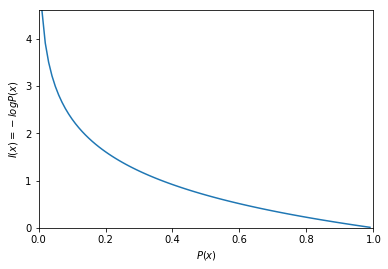

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(1,100)/100
plt.plot(x,-np.log(x))
plt.ylabel("$I(x)=-logP(x)$")
plt.xlabel("$P(x)$")
plt.xlim([0,1])
plt.ylim([0,max(-np.log(x))])
plt.show()

Itseinformaatio on kuitenkin kätevä vain yksittäisarvojen kanssa. Shannonin entropian (*Shannon entropy*) kaavalla voidaan laskea informaatioarvo koko jakaumalle, jolloin saatu informaatioarvo kertoo jonkinlaisen jakauman omaavan satunnaismuuttujan informaation odotusarvon. Jatkuvilla luvuilla sama entropian kaava tunnetaan nimellä differentiaalientropia (*differential entropy*). 

Informaatioarvo lasketaan jakauman odotusarvolle kaavalla

$$ H(P) = H(\text{x}) = \mathbb{E}_{x}[I(\text{x})].$$

Ja kun samaa satunnaismuuttujaa hyödyntävien jakaumien määrä kasvaa, voidaan hyödyntää Kullback-Leiblerin eroavuutta (*divergence*), joka on kaavaan puettuna

$$ D_{KL}(P \| Q) = \mathbb{E}_{x}\left[\text{log}\frac{P(\text{x})}{Q(\text{x})}\right] = \mathbb{E}_{x}[\text{log}P(\text{x})-\text{log}Q(\text{x})].$$

Koneoppimismallien kanssa toimiessa joudutaan usein tekemisiin huomattavan suurten satunnaismuuttujamäärien kanssa. Yhden, koko muuttujien kirjoa kuvailevan, todennäköisyysfunktion sijaan todennäköisyysjakaumat jaetaan ennemmin osiin. Nämä osat kerrottuna keskenään muodostavat sitten lopullisen todennäköisyysjakauman. Ositeltu todennäköisyysjakauma voidaan esittää strukturoituna todennäköisyysmallina (*structured probability model*) eli graafina (*graphical model*). Suunnatut (*directed*) graafit ilmentävät ehdollisia todennäköisyyksiä. Suuntaamattomat (*undirected*) graafit ilmentävät osittelua funktioiksi, jotka eivät normaalisti ole todennäköisyysjakaumia.

## 4. Numerical Computation

Iteratiiviset koneoppimisprosessit, joissa esimerkiksi mallin sisäisiä kertoimia päivitetään koulutusdatalla, teettävät tietokoneilla normaalisti suuret määrät laskentaa. Optimointi ja lineaaristen ongelmien ratkaisut lukeutuvat niihin. Vaikka koneilla laskiessa tulisi etenkin reaalilukujen kanssa pitää mielessä mahdolliset ali- ja ylivuoto-ongelmat (*underflow, overflow*), ei normaalitilanteessa tähän ole tarvetta. 

Koneoppimisen eri työkaluille on olemassa jo laajalti kirjastoja, jotka hoitavat lukujen käsittelyn stabiilisti. Merkittävämmän ongelman muodostavat liian nopeasti vaihtelevat funktiot, jotka reagoivat vahvasti jo desimaalien muutoksiin syöteluvuissa. Tällöin varmasti tapahtuvat pyöristysvirheet vaikuttavat lopputulokseen liiaksi.

Syväoppivat algoritmit pyrkivät usein joko minimoimaan tai maksimoimaan eli *optimoimaan* funktion $f(\text{x})$. Tätä funktiota kutsutaan useilla eri nimillä, kuten *objective function*, *criterion*, *loss function*, *cost function* tai *error function* - joka tapauksessa kyseessä on funktio, joka laskee esimerkiksi virhettä mallin tuottamien tulosten ja todellisten vertailuarvojen välillä. 

Virhe- ja kohdefunktiolla annetaan kirjassa eri merkitykset. Virhefunktio käsittää vain sen funktion, joka laskee mallin tuloksen ja kohdearvon erotuksen. Kohdefunktio käsittää tämän virheen lisäksi regularisoinnin mallin parametrien suhteen. Virhefunktio toisin sanoen sisältyy kohdefunktioon, mutta kohdefunktio koostuu perinteisesti virhefunktiosta, mallin parametreista ja regularisointimenetelmästä.

Kirjassa käytetään merkintää $x^*$ tarkoittamaan sellaista syötteen tai syötteiden arvoa, joka minimoi tai maksimoi optimoitavan kohdefunktion. Optimoinnissa hyödynnetään derivaattoja, joiden avulla saadaan selville funktion korjaussuunta - mihin suuntaan funktiota on korjattava, jotta virhe on ensi kierroksella hieman pienempi. 

### Gradient Descent

Tätä prosessia kutsutaan nimellä *gradient descent*, joka voidaan suomentaa vapaasti [kulmakertoimen] kaltevuuden pienennykseksi. Tavallisesti siitä käytetään suomenkielisessäkin tekstissä nimeä gradientti. Sitä hyödyntämällä voidaan löytää paikallisia minimejä, maksimeja tai satulapisteitä eli niin sanottuja kriittisiä pisteitä. Absoluuttisesti pienimmän arvon saavaa kohtaa kutsutaan globaaliksi minimiksi. Funktiosta riippuen näitä pisteitä voi olla joko yksi useampi, mutta niillä kaikilla on yhteinen pienin arvo suhteessa optimoitavan funktion arvojoukkoon.

Monisyötteisessä (*multiple input*) datassa hyödynnetään osaderivaattoja (*partial derivative*). Esimerkiksi osaderivaatta 

$$ \frac{\delta}{\delta_{x_i}}f(x) $$

kertoo, kuinka paljon funktio $f$ muuttuu, kun vain muuttuja $x_i$ muuttuu pisteessä $x$. Piste $x$ joka voi hyvin olla esimerkiksi moniulotteinen vektori, jolloin muuttuja $x_i$ olisi esimerkiksi yksi tämän vektorin alkioista. Yleisestettynä tätä kutsutaan gradientin ottamiseksi jostain suhteessa johonkin toiseen, esimerkin tapauksessa muuttujasta $x_i$ suhteessa funktioon $f$. Kun koko funktiosta otetaan gradientti, saadaan tulokseksi gradienttivektori, joka pitää sisällään kunkin syötteen alkioon liittyvän gradientin.

*Gradient descent* -algoritmin tavoitteena on etsiä kaikkein nopeiten funktiota pienentävä suunta. Siksi se tunnetaan myös nimellä jyrkimmän laskun metodi (*method of steepest descent*). Käytännössä jyrkin lasku löytyy suunnasta, joka on täysin vastakkainen gradienttivektorille $\Delta_x f(x)$. Siirtymällä askel askeleelta tähän suuntaan, päästään kohti metodin maalia, jolloin kaikki yksittäiset gradientit saavat arvon 0. Jotta oppimisesta ei kuitenkaan tulisi harppauksen omaista, otetaan mukaan myös oppimisen nopeuttava säätelevä suure $\epsilon$, oppimiskerroin (*learning rate*). 

Tällöin *gradient descentin* kaavaksi voidaan kirjoittaa yksinkertaistettuna

$$ x' = x - \epsilon \Delta_x f(x),$$

jossa $x'$ on aina uusi piste ja $\epsilon$ on oppimiskerroin. Oppimiskerroin $\epsilon$ voidaan asettaa kiinteäksi, kuten usein tehdäänkin, mutta sitä voidaan myös koittaa optimoida tilannekohtaisesti.

Kun gradientit on jokaisen mallin koulutettavan parametrin osalta saatu nollaan, voidaan todeta mallin löytäneen vähintäänkin lokaalisti datantuottoprosessia mallintavan parametrien konfiguraation. Kun gradientteja löytyy, on mallia toisinsanoen edelleen koulutettava, sillä koulutuksessa on tällöin virhettä, joihin mallin parametrit kontribuoivat.

### Gradient Descentin laajennokset

Jacobin matriisi (*Jacobian matrix*) on sellainen matriisi, kun halutaan selvittää mallin parametrien kulmakertoimet suhteessa virheeseen. Tarkentaen sitä tarvitaan, kun funktion $f: \mathbb{R}^m \to \mathbb{R}^n$ (syöte ja tuote ovat vektoreita) kaikki osaderivaatat tarvitsee selvittää. Joskus on myös tarpeen selvittää osaderivaattojen toiset derivaatat, jotta voidaan paremmin ymmärtää tehtävän muutoksen todellisia seurauksia. Tällöin ollaan tekemisissä Hessen matriisin (*Hessian matrix*) kanssa, johon talletetaan kaikkien mallin parametrien toisen asteen osaderivaatat eli kulmakertoimien kehityssuunnat. Ennenkaikkea tämän kaiken tarkoituksena on taata, että esimerkiksi koneoppimismallin kouluttamisen yhteydessä tehtävät asteittaiset muutokset pysyvät *aiotun* kokoisina eivätkä joko vaimene täysin tai karkaa käsistä.

Pelkällä osaderivaatalla ei aina saada suoraa selvyyttä siitä, kuinka vahvasti *gradient descentillä* tehdyt muutokset vaikuttavat lopullisesti. Tällöin toiset derivaatat auttavat. Mikäli funktion käyryys tai kiihtyvyys on jotain muuta kuin suoraa, siihen tehdyt muutokset joko vahvistuvat tai vaimenevat. Tämä pitää ottaa huomioon korjaamalla käyryyden vaikutus.

Toisella derivaatalla saadaan myös selville, että onko kohdattu kriittinen piste vain paikallinen arvo. Tällä on erityisesti merkitystä funktion minimoimisessa. Kun funktion kulmakerroin on 0 mutta se kaartuu tällaisessa pisteessa alaspäin, ollaan paikallisessa maksimissa. Ylöspäin kaartuessa ollaan taas paikallisessa minimissä. Tämäkään ei kuitenkaan ole vielä täydellinen testi, sillä käyryyden puuttuessa kriittinen piste voi hyvinkin olla myös vain satulapiste, josta voidaan edetä joko kohti uutta paikallista maksimia tai yhtäläisesti paikallista minimiä.

Yksinkertaistaen voidaan myös todeta, että mikäli funktion käyryydet ovat eri suuntiin kovin poikkeavat, perinteinen *gradient descent* ei toimi optimaalisesti. Mikäli funktio muodostaa ikäänkuin korkeaseinäisen kanjonin, jonka matalin piste on löydettävissä kulkien sen pohjaa pitkin, *gradient descent* pyrkii löytämään jyrkimmän laskun suunnan ja päätyy näin poukkoilemaan kanjonin seinältä toiselle edeten tuskaisen epäoptimaalisesti. Tätä varten hyödynnetään mm. Newtonin methodia, joka on kirjassa avattu tarkemmin.

Ensimmäistä derivaattaa eli Jacobin matriisia hyödyntäviä optimointialgoritmeja kutsutaan ensimmäisen asteen optimointialgoritmeiksi (*first-order optimization algorithm*). Hessen matriiseja, eli toista derivaattaa hyödyntäviä optimointialgoritmeja kutsutaan vastavuoroisesti toisen asteen optimointialgoritmeiksi (*second-order ...*). Tavallista kuitenkin on, että optimointialgoritmeja kehitetään joko spesifiin tarpeeseen sopiviksi (esim. selkeät ja rajatut ongelmat) tai sitten niiden käyttö ei ole mitenkään suoraviivaista (esim. syväoppiminen ja funktioiden kokonaisuuden monimutkaisuus).

Optimointimenetelmiä on siis useita. Mainittujen funktioiden rajaamisen Lipschitzin vakiolla (*Lipschitz constant*) ja kuperan optimoinnin (*convex optimization*) esitellään myös rajattu optimointi (*constrained optimization*), jossa kaikkein mahdollisten arvojen sijasta funktio pyritään optimoimaan vain rajatulle joukolle.